# GloVe (Gensim)

For looking at word vectors, we'll use **Gensim**. **Gensim** isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.   We gonna use **GloVe** embeddings, downloaded at [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

In [5]:
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import gensim

#you have to put this file in some python/gensim directory; just run it and it will inform where to put....


In [6]:
from nltk.corpus import brown
model = gensim.models.Word2Vec(brown.sents())

In [7]:
# model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

In [8]:
similar_words = new_model.wv.most_similar(positive=['government'], topn=5)
print("Most similar words to 'government':", similar_words)


Most similar words to 'government': [('nation', 0.9280838370323181), ('policy', 0.9250353574752808), ('power', 0.9234175086021423), ('Christian', 0.9232916235923767), ('education', 0.9203680753707886)]


### Similarity

In [9]:
model

In [10]:
model.wv.most_similar('government')


[('nation', 0.9279057383537292),
 ('policy', 0.9250144362449646),
 ('Christian', 0.9232736229896545),
 ('power', 0.9232452511787415),
 ('education', 0.9202072024345398),
 ('national', 0.9139093160629272),
 ('community', 0.9122931957244873),
 ('land', 0.9081918597221375),
 ('property', 0.9075236320495605),
 ('influence', 0.9051196575164795)]

In [11]:
model.wv.most_similar('news')

[('Review', 0.9577980041503906),
 ('delightful', 0.9483787417411804),
 ('Don', 0.9465796947479248),
 ('Inquirer', 0.9457221627235413),
 ('ended', 0.9447577595710754),
 ('birth', 0.9441759586334229),
 ('whipped', 0.9437397122383118),
 ('Spirit', 0.9433591365814209),
 ('painting', 0.9433534741401672),
 ('device', 0.9419150352478027)]

In [12]:
model.wv.most_similar('cockpit')

[('burst', 0.9702394008636475),
 ('canvas', 0.9620493650436401),
 ('blood', 0.9619907736778259),
 ('dust', 0.9555068016052246),
 ('flowing', 0.9554644823074341),
 ('bank', 0.9544098973274231),
 ('passing', 0.9529252052307129),
 ('dirt', 0.9526296854019165),
 ('stomach', 0.9521534442901611),
 ('pocket', 0.9510592818260193)]

In [13]:
#multiple meanings....
model.wv.most_similar("plant")

[('annual', 0.9619813561439514),
 ('stock', 0.9529207348823547),
 ('energy', 0.9506484270095825),
 ('location', 0.9442635774612427),
 ('loss', 0.9398342967033386),
 ('expansion', 0.9392889142036438),
 ('department', 0.9380192756652832),
 ('substrate', 0.9379692673683167),
 ('central', 0.9372914433479309),
 ('minimum', 0.9368343353271484)]

In [14]:
model.wv.most_similar(negative='pilot')

[('Pozzatti', -0.004299193620681763),
 ('no', -0.13609802722930908),
 ('could', -0.14059874415397644),
 ('I', -0.14125190675258636),
 ('would', -0.14532732963562012),
 ('they', -0.14568939805030823),
 ('were', -0.14871619641780853),
 ('Manuel', -0.1493726521730423),
 ('We', -0.15025247633457184),
 ('should', -0.1529759019613266)]

In [15]:
#woman + king - man
result = model.wv.most_similar(positive=['pilot', 'flight'], negative=['member'])
print("{}: {:.4f}".format(*result[0]))

pains: 0.9277


In [16]:
result = model.wv.most_similar(positive=['fraud', 'member'], negative=['Italy'])
print("{}: {:.4f}".format(*result[0]))

urbanization: 0.8427


### Cosine Similarity

We have talked about this in the last class.  Here we can conveniently use `distance` to find the cosine distance between two words. Note that distance = 1 - similarity.

In [17]:
w1 = "flight"
w2 = "pilot"
w3 = "news"
w1_w2_dist = model.wv.distance(w1, w2)
w1_w3_dist = model.wv.distance(w1, w3)

#dog is much closer to cat then dog to fruit
w1_w2_dist, w1_w3_dist

(0.08878970146179199, 0.13059818744659424)

In [18]:
w1 = "happy" # synonym 1
w2 = "cheerful" # synonym 2
w3 = "sad" # antonym
w1_w2_dist = model.wv.distance(w1, w2)
w1_w3_dist = model.wv.distance(w1, w3)

#$w_1$="happy" is closer to $w_3$="sad" than to $w_2$="cheerful"!!
#those similarlity does not handle antonym....
w1_w2_dist, w1_w3_dist

(0.381563663482666, 0.13220059871673584)

### Analogy

In [19]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [18]:
analogy('japan', 'sushi', 'italy')

'tapas'

In [19]:
analogy('australia', 'beer', 'france')

'champagne'

In [20]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [21]:
analogy('tall', 'tallest', 'long')

'longest'

In [22]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [23]:
analogy('bird', 'fly', 'human')

'bound'

In [24]:
#which word in the list does not belong
print(model.doesnt_match("coke pepsi sprite water".split()))

water


### Visualization

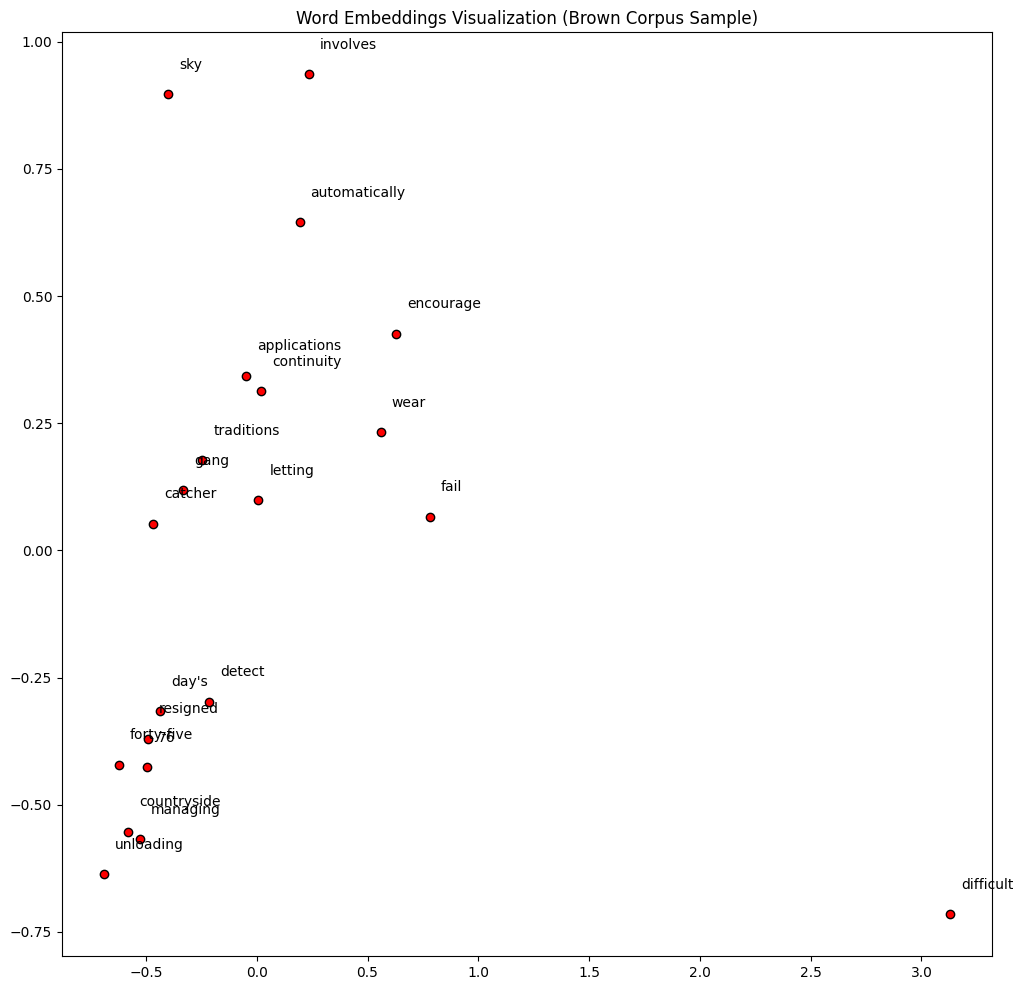

In [21]:

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import brown
import random

# Extract words from the Brown corpus and filter out duplicates
words_from_brown = list(set(word.lower() for sent in brown.sents() for word in sent))

# Randomly sample a subset of words for visualization (optional)
# Adjust `sample_size` to include more or fewer words
sample_size = 100
random_words = random.sample(words_from_brown, sample_size)

# Filter out words not in the Word2Vec vocabulary
valid_words = [word for word in random_words if word in new_model.wv.key_to_index]

# Get the word vectors for the valid words
word_vectors = np.array([new_model.wv[word] for word in valid_words])

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
twodim = pca.fit_transform(word_vectors)

# Plot the results
plt.figure(figsize=(12, 12))
plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
for word, (x, y) in zip(valid_words, twodim):
    plt.text(x + 0.05, y + 0.05, word, fontsize=10)

plt.title("Word Embeddings Visualization (Brown Corpus Sample)")
plt.show()


In [22]:
# Function to load and split the dataset into semantic and syntactic questions
def load_dataset(filepath):
    """
    Load the analogy dataset and split into semantic and syntactic categories.
    Args:
        filepath (str): Path to the dataset file.
    Returns:
        tuple: Two lists containing semantic and syntactic analogy questions.
    """
    semantic_questions = []
    syntactic_questions = []
    current_section = None

    with open(filepath, "r") as f:
        for line in f:
            line = line.strip()
            if line.startswith(":"):
                # Identify the section type
                if "capital-common-countries" in line.lower():
                    current_section = "semantic"
                elif "past-tense" in line.lower():
                    current_section = "syntactic"
                else:
                    current_section = None
            elif current_section == "semantic":
                semantic_questions.append(line.split())
            elif current_section == "syntactic":
                syntactic_questions.append(line.split())
    
    return semantic_questions, syntactic_questions

In [23]:
# Define calculate_accuracy function
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_accuracy(questions, word_vectors, word2index):
    """
    Calculate accuracy for analogy questions.
    Args:
        questions (list): List of analogy questions in format [a, b, c, d].
        word_vectors (np.array): Word embedding matrix.
        word2index (dict): Mapping of words to their indices in the embedding matrix.
    Returns:
        float: Accuracy as a percentage.
    """
    correct = 0
    total = 0

    for a, b, c, d in questions:
        try:
            # Ensure all words are in the vocabulary
            if a in word2index and b in word2index and c in word2index and d in word2index:
                vec_a = word_vectors[word2index[a]]
                vec_b = word_vectors[word2index[b]]
                vec_c = word_vectors[word2index[c]]

                # Compute vector: b - a + c
                target_vector = vec_b - vec_a + vec_c

                # Compute cosine similarities
                similarities = cosine_similarity(target_vector.reshape(1, -1), word_vectors)
                predicted_index = np.argmax(similarities)

                # Retrieve the predicted word
                predicted_word = list(word2index.keys())[predicted_index]

                if predicted_word == d:
                    correct += 1
                total += 1
        except KeyError:
            # Skip if any word is not in the vocabulary
            continue

    return (correct / total) * 100 if total > 0 else 0

In [24]:
# Load the dataset
dataset_file = "word-test.v1.txt"



# Load semantic and syntactic questions
semantic_questions, syntactic_questions = load_dataset(dataset_file)

# Prepare word vectors and word2index
word_vectors = new_model.wv.vectors  # Word embedding matrix
word2index = {word: idx for idx, word in enumerate(new_model.wv.index_to_key)}



# Calculate accuracies
semantic_accuracy = calculate_accuracy(semantic_questions, word_vectors, word2index)
syntactic_accuracy = calculate_accuracy(syntactic_questions, word_vectors, word2index)

# Print results
print(f"Semantic Accuracy: {semantic_accuracy:.2f}%")
print(f"Syntactic Accuracy: {syntactic_accuracy:.2f}%")


Semantic Accuracy: 0.00%
Syntactic Accuracy: 0.08%


In [40]:
print(new_model.wv['the'])

[ 0.24293298  1.5617957   0.5121485   0.52857745 -0.6878522  -0.9278225
  1.5899794  -0.10833415 -0.5321149  -0.48679182  0.63970643  0.2374652
  0.9493387  -0.41469616 -0.45870706  1.0161306  -1.3428508  -0.868837
 -0.4796059  -1.311169    0.7913593   0.9862174   0.36956704 -0.5558142
 -0.726037    0.32404464  0.54611385 -1.1215762  -1.141693    0.8444152
 -0.59419286 -0.04327312  0.04307627  0.8041814   0.27291322 -0.9345959
  0.19817194 -0.4103749  -1.2073148  -0.1963934  -1.1235744   0.36000973
 -0.06948667 -0.4403129   1.0132779   0.5542793   0.39819375  0.9400895
  0.2582892  -0.06010263 -0.10383717  0.5144473   0.46930748 -0.6184748
  0.71805584 -0.66957307  0.49415126 -0.7171561  -1.4998271   0.04714202
  1.2313678   0.76767147 -0.74596274 -1.0724891  -0.7305984   0.45220396
 -1.2393025   0.8642767  -0.7585473   0.6133182   0.07486981 -0.11232229
 -0.5617895  -0.81546354  0.22068542  1.2461424   0.8397422  -0.4387315
  0.06597789 -0.43028614 -0.03245175  0.8370363   0.54896975 

In [25]:
def load_similarity_dataset(filepath):
    """
    Load the WordSim similarity dataset.
    Args:
        filepath (str): Path to the dataset file.
    Returns:
        list: List of tuples (word1, word2, human_score).
    """
    pairs = []
    with open(filepath, "r") as f:
        lines = f.readlines()
        for line in lines:
            word1, word2, score = line.strip().split()
            pairs.append((word1, word2, float(score)))
    return pairs




In [26]:
# Example: Load `wordsim_similarity_goldstandard`
similarity_dataset = load_similarity_dataset("wordsim353/wordsim_similarity_goldstandard.txt")
print(f"Loaded {len(similarity_dataset)} word pairs from the dataset.")

Loaded 203 word pairs from the dataset.


In [29]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
import numpy as np



# Function to compute model similarity using dot product
def compute_model_similarity(word_vectors, similarity_dataset):
    """
    Compute model similarity for word pairs using dot product.
    Args:
        word_vectors (dict): Dictionary mapping words to their embeddings.
        similarity_dataset (list): List of tuples (word1, word2, human_score).
    Returns:
        tuple: List of model scores and human similarity scores.
    """
    model_scores = []
    human_scores = []

    for word1, word2, human_score in similarity_dataset:
        if word1 in word_vectors and word2 in word_vectors:
            vec1 = word_vectors[word1]
            vec2 = word_vectors[word2]
            model_score = np.dot(vec1, vec2)  # Dot product as similarity
            model_scores.append(model_score)
            human_scores.append(human_score)
        else:
            print(f"Skipping pair ({word1}, {word2}): Out of vocabulary")

    return model_scores, human_scores


   


In [34]:
# Create word_vectors from the model
word_vectors = {word: new_model.wv[word] for word in new_model.wv.index_to_key}

# Compute the scores
model_scores, human_scores = compute_model_similarity(word_vectors, similarity_dataset)

# Handle empty results if any
if len(model_scores) == 0 or len(human_scores) == 0:
    print("Error: No valid word pairs found. Cannot compute similarity metrics.")
else:
    # Calculate Spearman Correlation
    correlation, p_value = spearmanr(model_scores, human_scores)
    print(f"Spearman Correlation: {correlation:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Calculate Mean Squared Error
    mse = mean_squared_error(human_scores, model_scores)
    print(f"Mean Squared Error (MSE): {mse:.4f}")


Skipping pair (cucumber, potato): Out of vocabulary
Skipping pair (king, rook): Out of vocabulary
Skipping pair (fuck, sex): Out of vocabulary
Skipping pair (football, soccer): Out of vocabulary
Skipping pair (Arafat, Jackson): Out of vocabulary
Skipping pair (vodka, gin): Out of vocabulary
Skipping pair (vodka, brandy): Out of vocabulary
Skipping pair (gem, jewel): Out of vocabulary
Skipping pair (asylum, madhouse): Out of vocabulary
Skipping pair (magician, wizard): Out of vocabulary
Skipping pair (bird, crane): Out of vocabulary
Skipping pair (food, rooster): Out of vocabulary
Skipping pair (tiger, jaguar): Out of vocabulary
Skipping pair (tiger, feline): Out of vocabulary
Skipping pair (tiger, carnivore): Out of vocabulary
Skipping pair (tiger, mammal): Out of vocabulary
Skipping pair (tiger, fauna): Out of vocabulary
Skipping pair (psychology, psychiatry): Out of vocabulary
Skipping pair (precedent, antecedent): Out of vocabulary
Skipping pair (cup, tableware): Out of vocabulary
S

In [35]:
print("Model Score vs Human Score\n")
print(model_scores)
print(human_scores)

Model Score vs Human Score

[0.2636452, 0.09986299, 11.193084, 8.769119, 4.9131165, 2.227611, 2.9236593, 1.7315123, 2.6863885, 3.1246262, 0.66765136, 3.4583485, 4.097802, 1.1105068, 0.1448311, 0.91283554, 1.4731244, 0.9286227, 4.662569, 4.0394993, 0.97866476, 0.7732557, 2.8201995, 0.2605217, 0.58949065, 3.6798487, 0.5782098, 4.1441, 1.2454045, 0.60624045, 0.06838526, 1.9688085, 1.0869204, 0.44689113, 1.0309937, 1.7594883, 1.808565, 4.1165276, 1.0241652, 1.1955478, 5.6508474, 4.2342386, 25.65307, 3.3880036, 2.801402, 1.6490415, 13.089022, 5.3028398, 12.702629, 11.086023, 0.9809389, 7.214598, 4.293868, 1.009791, 0.22519693, 2.5488079, 0.7476666, 4.6274233, 6.852212, 0.61767614, 28.442516, 5.225531, 3.669213, 0.35669845, 6.588657, 3.4064012, 4.914613, 1.2460282, 5.594714, 0.7003756, 7.6465282, 6.4703493, 2.1939778, 6.9818354, 1.2784842, 7.9586163, 4.316806, 1.0335865, 1.6281059, 3.8454542, 9.129059, 5.400036, 3.7202632, 1.6942194, 3.172385, 0.66770536, 1.130409, 2.6103678, 8.124785, 3.028